In [5]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [6]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 23_03_2022 07_34_00.xlsx'

In [7]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [8]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [40]:
#Filtrando a tabela apenas com as colunas de interece
filtrado = dados[['Sem Epi Internacao','Classificacao final','Evolucao']]

In [41]:
#Filtrando a coluna Classificacao final apenas com valores de COVID-19
covid19 = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
covid19 = covid19.dropna()

In [42]:
#utilizando covid19 e agrupando pela semana de internacao
contacasos = covid19.groupby('Sem Epi Internacao').count()
contacasos.head()

,Classificacao final,Evolucao
Sem Epi Internacao,,
2020_11,1,1
2020_12,19,19
2020_13,101,101
2020_14,111,111
2020_15,66,66


In [43]:
#Guardado em confirmado os valores da coluna 
confirmado = contacasos
confirmado = confirmado.drop(['2022_12'])
confirmado = confirmado['Classificacao final']
confirmado

Sem Epi Internacao
2020_11      1
2020_12     19
2020_13    101
2020_14    111
2020_15     66
          ... 
2022_07    737
2022_08    511
2022_09    339
2022_10    199
2022_11    112
Name: Classificacao final, Length: 106, dtype: int64

In [44]:
#Filtrando os casos não informados
nao_informado = filtrado.loc[filtrado['Classificacao final']=='Não Informado'] #Valores da coluna Classificacao final apenas com valor Não Informado
nao_informado = nao_informado.dropna()
nao_informado = nao_informado.groupby('Sem Epi Internacao').count() #Agrupando pela semana de internacao
nao_informado = nao_informado.merge(contacasos, how =  'outer', left_index = True, right_index = True) #Juntando os dataframes nao_informado com o contacasos para ter o mesmo numero de linha com base na semana de internacao
nao_informado = nao_informado.fillna(0) #O que está com valor NaN recebe o valor 0
nao_informado = nao_informado.drop(['2022_12'])
nao_informado = nao_informado['Classificacao final_x'] 
nao_informado

Sem Epi Internacao
2020_11     0.0
2020_12     0.0
2020_13     0.0
2020_14     0.0
2020_15     0.0
           ... 
2022_07    27.0
2022_08    41.0
2022_09    18.0
2022_10    22.0
2022_11    50.0
Name: Classificacao final_x, Length: 106, dtype: float64

In [45]:
#Filtrando os casos de SRAG
srag = filtrado
srag['Classificacao final'] = srag['Classificacao final'].map(lambda x: str(x)[0:4]) #Como tem SRAG... utilizamos isso para pegar apenas os 4 primeiros caracteres, no caso SRAG
srag = srag.loc[srag['Classificacao final']=='SRAG'] #Valores da coluna Classificacao final apenas com valores SRAG
srag = srag.groupby('Sem Epi Internacao').count() #Agrupa pela semana de internacao
srag = srag.drop(['2020_01','2020_02','2020_03','2020_04','2020_05','2020_06','2020_07',
        '2020_08','2020_09','2020_10']) #Dropando as semanas de internacao que nao sao de interesse
srag = srag.merge(contacasos,how='outer',left_index=True,right_index=True)
srag = srag.fillna(0)
srag = srag.drop(['2022_12'])
srag = srag['Classificacao final_x']
srag

C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_14596/2088543961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srag['Classificacao final'] = srag['Classificacao final'].map(lambda x: str(x)[0:4]) #Como tem SRAG... utilizamos isso para pegar apenas os 4 primeiros caracteres, no caso SRAG


Sem Epi Internacao
2020_11     46
2020_12    134
2020_13    496
2020_14    493
2020_15    422
          ... 
2022_07    205
2022_08    218
2022_09    173
2022_10    185
2022_11    124
Name: Classificacao final_x, Length: 106, dtype: int64

In [46]:
#Criando o eixo x com os valores da semana de internacao
semana = covid19.sort_values('Sem Epi Internacao',ascending=True) #Coloca a coluna semana de internacao em ordem crescente de valores
semana = semana.groupby('Sem Epi Internacao').count()
semana = semana.drop(['2022_12'])
semana = semana.reset_index() #Reseta o index
semana = semana['Sem Epi Internacao']
semana

0      2020_11
1      2020_12
2      2020_13
3      2020_14
4      2020_15
        ...   
101    2022_07
102    2022_08
103    2022_09
104    2022_10
105    2022_11
Name: Sem Epi Internacao, Length: 106, dtype: object

In [47]:
#Cria o eixo y de 0 a 6600 em intervalos de 700
eixoy = np.arange(0,7300,700)

In [48]:
#Pega o tamanho da variavel tamanho e faz com que o eixo x pule os valores de 2 em 2
tamanho_semana = np.size(semana)
eixo_x = np.arange(1,tamanho_semana,2)

In [49]:
#Cria a legenda para o grafico
legenda = pd.DataFrame(columns = ['Covid-19 confirmado','Covid-19 descartado','Em investigação'])

In [50]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 23_3_2022'

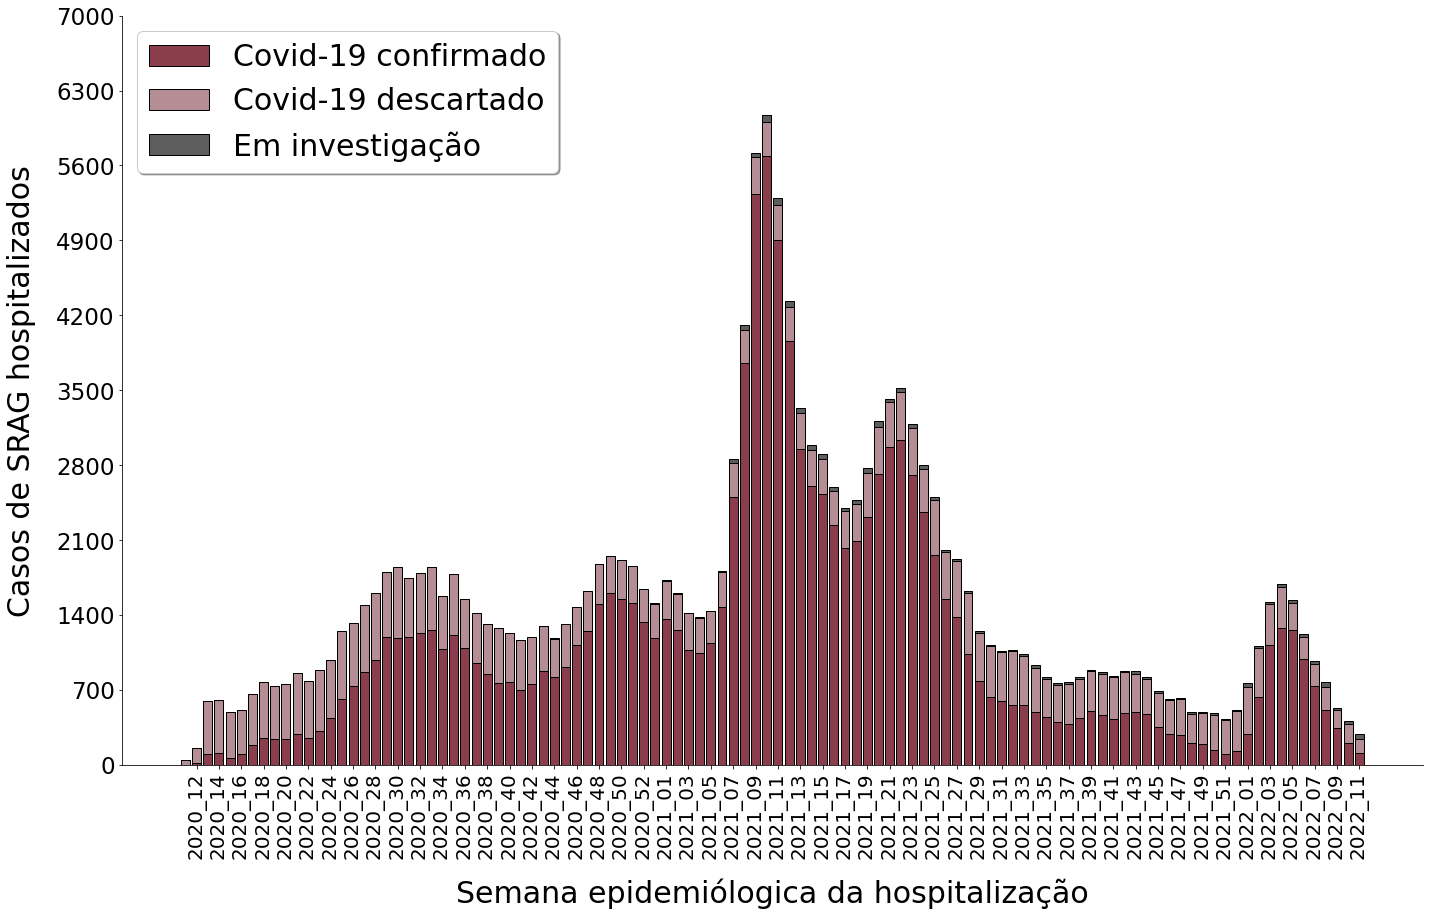

In [51]:
#Plotagem do grafico
plt.figure(figsize=(tamanho_semana*0.22,tamanho_semana*0.13))
plt.bar(semana,confirmado, color='#8a3e4b',edgecolor='#000000')
plt.bar(semana,srag, bottom=confirmado, color = '#b58d94',edgecolor='#000000')
plt.bar(semana,nao_informado, bottom = np.array(confirmado)+np.array(srag), color = '#5e5d5d',edgecolor='#000000')
sns.despine()
plt.legend(legenda, fontsize=30,shadow=True,loc='upper left')
#plt.annotate('Primeiro caso\nhospitalizado por\nCOVID-19 no RS',xy=(3,620),xytext=(2,1500),arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15,
#                bbox=dict(fc="white", ec="#000000", lw=1,pad=10))
plt.xticks(eixo_x)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(eixoy,fontsize=23)
plt.xlabel('Semana epidemiólogica da hospitalização',labelpad=20,fontsize=30)
plt.ylabel('Casos de SRAG hospitalizados',labelpad=20,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide4.png',dpi=720,bbox_inches='tight')

In [52]:
zoomConfirmado = confirmado.to_frame()
zoomConfirmado = zoomConfirmado['2021_51':]
zoomConfirmado = zoomConfirmado['Classificacao final']
zoomConfirmado

Sem Epi Internacao
2021_51     101
2021_52     127
2022_01     285
2022_02     634
2022_03    1121
2022_04    1281
2022_05    1254
2022_06     985
2022_07     737
2022_08     511
2022_09     339
2022_10     199
2022_11     112
Name: Classificacao final, dtype: int64

In [53]:
zoomSrag = srag.to_frame()
zoomSrag = zoomSrag['2021_51':]
zoomSrag = zoomSrag.reset_index()
zoomSrag = zoomSrag.set_index('Sem Epi Internacao')
#zoomSrag = zoomSrag.reset_index()
zoomSrag = zoomSrag['Classificacao final_x']
zoomSrag

Sem Epi Internacao
2021_51    314
2021_52    377
2022_01    441
2022_02    456
2022_03    379
2022_04    383
2022_05    258
2022_06    212
2022_07    205
2022_08    218
2022_09    173
2022_10    185
2022_11    124
Name: Classificacao final_x, dtype: int64

In [54]:
zoomNaoInformado = nao_informado.to_frame()
zoomNaoInformado = zoomNaoInformado['2021_51':]
zoomNaoInformado = zoomNaoInformado.reset_index()

In [55]:
semana = zoomNaoInformado['Sem Epi Internacao']
semana

0     2021_51
1     2021_52
2     2022_01
3     2022_02
4     2022_03
5     2022_04
6     2022_05
7     2022_06
8     2022_07
9     2022_08
10    2022_09
11    2022_10
12    2022_11
Name: Sem Epi Internacao, dtype: object

In [56]:
zoomNaoInformado = zoomNaoInformado['Classificacao final_x']
zoomNaoInformado

0     12.0
1      6.0
2     33.0
3     17.0
4     23.0
5     28.0
6     30.0
7     25.0
8     27.0
9     41.0
10    18.0
11    22.0
12    50.0
Name: Classificacao final_x, dtype: float64

In [57]:
#zoomConfirmado = zoomConfirmado['Classificacao final']
#zoomSrag = zoomSrag['Classificacao final_x']
#zoomNaoInformado = zoomNaoInformado['Classificacao final_x']

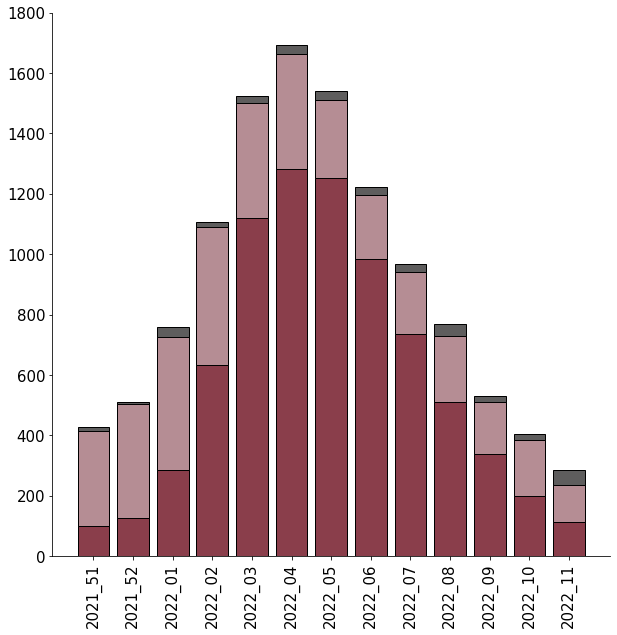

In [58]:
plt.figure(figsize=(10,10))
width=0.8
plt.bar(semana,zoomConfirmado,width,color='#8a3e4b',edgecolor='#000000')
plt.bar(semana,zoomSrag,width,bottom=zoomConfirmado,color = '#b58d94',edgecolor='#000000')
plt.bar(semana,zoomNaoInformado,width,bottom=zoomConfirmado+zoomSrag,color = '#5e5d5d',edgecolor='#000000')
sns.despine()
plt.xticks(fontsize=15,rotation=90)
plt.yticks(np.arange(0,2000,200),fontsize=15)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide4_ZOOM.png',dpi=720,bbox_inches='tight')